### IDLE: I recommend using anaconda spyder as an idle when Wrangling data. You can view variables with the variable explorer, as well as plots. 
## -----Data Wrangling packages------
#### Pandas: Gives us dataframes, can perform math operations across entire dataset or just a column 
#### Numpy: Gives us numpy arrays, can perform math operations across entire array
## -----Graphing packages------------
#### matplotlib
#### Seaborn: I did not use this but another option to check out. https://seaborn.pydata.org/

# First we need to import packages to use their functionality. Use "import XXXX as XX" instead of just import XXXX
For example "import pandas as pd" instead of import pandas.
This way when we want to use functions within the pandas package we can just right pd.function() vs pandas.function(). Its a shortcut!

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
import matplotlib.pyplot as plt
import random
import scipy.stats

## Lets bring our data in using pd.read_csv(path to file) and pd.read_excel(path to file)

In [4]:
background_df = pd.read_csv(r'C:\Users\cc-ch\Desktop\Upwork\Physics\background.csv')
cesium_df = pd.read_csv(r'C:\Users\cc-ch\Desktop\Upwork\Physics\cesium.csv')
muon_df = pd.read_excel(r'C:\Users\cc-ch\Desktop\Upwork\Physics\muon.xls')  # I added a header to the excel file and deleted the index
muon_df = muon_df.to_numpy() # I changed dataframe into a numpy array using df.to_numpy()

## Notes on variable calling and indexing[0]

You can call two variables at once like this:
* variable1, variable2 = 1, 2 
#### instead of:
* variable1 = 1
* variable2 = 2

**cesium_df** is our variable that holds the pandas dataframe. I am calling **.min()** and **.max()** on the dataframe to find the **minimum** and **maximum value**. The functions finds the min/max for each column so it returns a **series** [max for col1, max for col2, etc.]. We just have one column so I **index** the first element of the series **"myseries[0]"** to get the first value.

#### another way to write this is:
* first_edge = cesium_df.min()         
* first_edge = cesium_df[0]
* last_edge = cesium_df.min()
* last_edge = cesium_df[0]

In [5]:
first_edge, last_edge = cesium_df.min(), cesium_df.max() 
first_edge, last_edge = first_edge[0], last_edge[0]

# Plot a histogram!
#### Parameters of plt.hist( )
* **range**: takes two numbers [#,#], Sets the range of the graph. I used the min and max value of the dataset for this
* **bins**: takes an int, sets the number of bins in the histogram
* **edgecolor**: takes a string, controls the color of the outline (defines bar)

#### Documentation
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

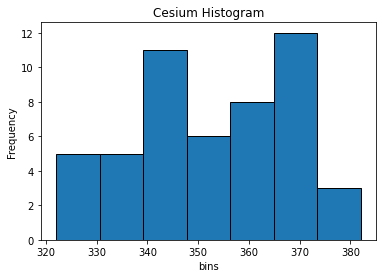

In [6]:
plt.hist(cesium_df, range=[first_edge, last_edge], bins = 7, edgecolor='black')
plt.xlabel('bins') # x-axis title
plt.ylabel('Frequency') # y-axis title
plt.title('Cesium Histogram') # Title histogram
plt.show() # shows plot


## Some Data Calculations!

In [8]:
# calculate the mean for the background
mean_background = background_df.mean() # I used the datafram function .mean() to calculate the mean across the entire dataset for each column, it returns a series
mean_background = mean_background[0] # df.mean() gave me a series but I just want a value. Here I just indexed the series to pull the value. (a series is kind of like a list, you can pull a single value from the series/list using an index)
# subract mean background counts from your measurements (cesium)
cesium_df = cesium_df - mean_background # applying math function (subtraction) to entire dataframe. You can apply it to a single column if you specify the column like this df['name_of_column']

# calculate the mean for your data sample
mean_cesium = cesium_df.mean() # same as above
mean_cesium = mean_cesium[0]
# generate Poisson distribution with sample size 50
x = poisson.rvs(mu=mean_cesium, size=50)

## Create a two plots over eachother 
To do so just use two plt.hist functions! Note: it does not need to be plt.hist, could do plt.plot etc.

* **alpha** controls the transparency, This way we can see the distribution behind it.

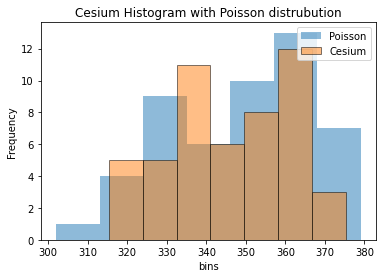

In [9]:
# plot two histograms on same plot (page 6)
y = cesium_df # cesium data
x = x # poisson data
plt.hist(x, bins=7, alpha=0.5, label='Poisson') # alpha makes chart ligher color and more transparent
plt.hist(y, bins=7, alpha=0.5, label='Cesium', edgecolor='black')
plt.legend(loc='upper right') # add legend, loc stands for location (location of legend)
plt.xlabel('bins')
plt.ylabel('Frequency')
plt.title('Cesium Histogram with Poisson distrubution')
plt.show()

## Histograms vs Barcharts
For some reason, we need to use bar charts to create histograms. Bar charts support more functionalities when utilzing error bars and trend lines

## std deviation
* if you need the std dev. you can use dataframename.std() to find the std. deviation of each column in dataframe
## What we need to turn a bar chart into a histogram
* bins
* counts of instances that lie within each bin
* use np.histogram() to find bins and counts
## Error Bars
* Need square root
* use np.sqrt()

list() turns variable into a list. example, variable1 is an np.array
* use **variable1 = list(variable1)** to turn it into a list

In [12]:
# calculate the standard deviation of cesium
sigma = cesium_df.std()
sigma = sigma[0]
# use np.histogram to find counts in each bin 
counts, bin_edges = np.histogram(cesium_df, bins=7)
counts = list(counts) # can use list() to turn variable into a list. Sometimes you need different variable types.
# use numpy to take square root of counts to get standard deviation
error = list(np.sqrt(counts)) 


## Plot a bar chart with plt.bar()
* width: increases the width of the bars, if you have man bars (200) the width needs to be around 20 or the bars will not show up.
* x is a list of bin data
* y is a list of counts (the frequency of instances lie within each of the bins)
* linestyle takes a string, controls the linestyle
#### documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

## Plot error bars
* use plt.errorbar() to create the error bars
* x, y is the data from above
* yerr = the error of y
* ecolor = the color of the error bars


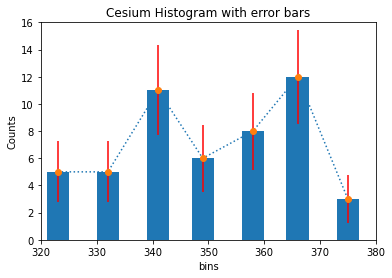

In [13]:

x = list(bin_edges[1:].astype(int)) # this is a list of bins, I used a slice to omit the first value in the array.
y= counts
# Plot Bar chart 
plt.bar(x,y, width = 4) 
plt.plot(x,y, linestyle='dotted') 
plt.errorbar(x, y, yerr = error, fmt='o',ecolor = 'red') 
# Set axes limit
plt.xlim(320, 380) # limits x axis on graph
plt.ylim(0,16)      # limits y axis on graph
plt.xlabel('bins')
plt.ylabel('Counts')
plt.title('Cesium Histogram with error bars')
plt.show()

## Muon Decay

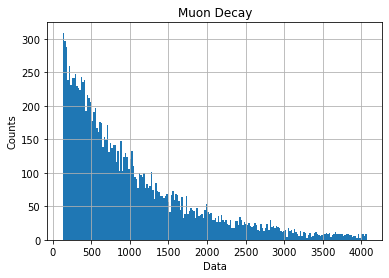

In [14]:
# plot histogram of muon using the matplotlib package
# ADC channel numbers less than	125	and	greater	than 4075, userange parameter, set number of bins to 200 using the bin parameter
first_edge, last_edge = muon_df.min(), muon_df.max()
plt.hist(muon_df, range=[125, 4075], bins = 200)
plt.xlabel('Data')
plt.ylabel('Counts')
plt.title('Muon Decay')
plt.grid(True)
plt.show()

## Lets log transform the y axis
* use np.log10()
* I beleive np.log2() is the natural log

In [ ]:
counts, bin_edges = np.histogram(muon_df, bins=200)
counts = list(np.log10(counts))
error = list(np.sqrt(counts))

## Plot with trend line with plt.plot
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html


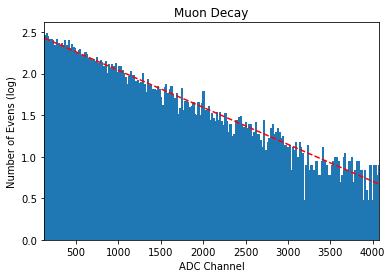

In [19]:
# Define Data
x = list(bin_edges[1:].astype(int))
y= counts

# Plot Bar chart
plt.bar(x,y, width = 25)
plt.xlim(125,4075) # limits data range along x axis
# plt.errorbar(x, y), yerr = error, fmt='o',ecolor = 'red') # Plot error bars, I think I did the calculation wrong here
plt.xlabel('ADC Channel')
plt.ylabel('Number of Evens (log)')
plt.title('Muon Decay')

# Getting the mean and standard deviation of the sample data dt using scipy.stats
mn, std = scipy.stats.norm.fit(muon_df) 
y_curve = scipy.stats.norm.pdf(bin_edges, mn, std)
# plot trend line
z = np.polyfit(x, y, 1) # Least squares polynomial fit.
p = np.poly1d(z) # A one-dimensional polynomial class.
plt.plot(x,p(x),"r--") # p(x) you are multiplying two vectors a

In [20]:
p(x)

array([2.4249527 , 2.41604916, 2.40714562, 2.39824208, 2.38933854,
       2.380435  , 2.37153146, 2.36262791, 2.35372437, 2.34482083,
       2.33636247, 2.32745893, 2.31855539, 2.30965185, 2.30074831,
       2.29184476, 2.28294122, 2.27403768, 2.26513414, 2.2562306 ,
       2.24777224, 2.2388687 , 2.22996516, 2.22106161, 2.21215807,
       2.20325453, 2.19435099, 2.18544745, 2.17654391, 2.16764037,
       2.15918201, 2.15027846, 2.14137492, 2.13247138, 2.12356784,
       2.1146643 , 2.10576076, 2.09685722, 2.08795368, 2.07905014,
       2.07059177, 2.06168823, 2.05278469, 2.04388115, 2.03497761,
       2.02607407, 2.01717053, 2.00826699, 1.99936345, 1.99045991,
       1.98200154, 1.973098  , 1.96419446, 1.95529092, 1.94638738,
       1.93748384, 1.9285803 , 1.91967676, 1.91077322, 1.90186967,
       1.89341131, 1.88450777, 1.87560423, 1.86670069, 1.85779715,
       1.84889361, 1.83999007, 1.83108652, 1.82218298, 1.81327944,
       1.80482108, 1.79591754, 1.787014  , 1.77811046, 1.76920

In [21]:
p

poly1d([-4.45177043e-04,  2.48460642e+00])

In [22]:
x

[134,
 154,
 174,
 194,
 214,
 234,
 254,
 274,
 294,
 314,
 333,
 353,
 373,
 393,
 413,
 433,
 453,
 473,
 493,
 513,
 532,
 552,
 572,
 592,
 612,
 632,
 652,
 672,
 692,
 712,
 731,
 751,
 771,
 791,
 811,
 831,
 851,
 871,
 891,
 911,
 930,
 950,
 970,
 990,
 1010,
 1030,
 1050,
 1070,
 1090,
 1110,
 1129,
 1149,
 1169,
 1189,
 1209,
 1229,
 1249,
 1269,
 1289,
 1309,
 1328,
 1348,
 1368,
 1388,
 1408,
 1428,
 1448,
 1468,
 1488,
 1508,
 1527,
 1547,
 1567,
 1587,
 1607,
 1627,
 1647,
 1667,
 1687,
 1707,
 1726,
 1746,
 1766,
 1786,
 1806,
 1826,
 1846,
 1866,
 1886,
 1905,
 1925,
 1945,
 1965,
 1985,
 2005,
 2025,
 2045,
 2065,
 2085,
 2105,
 2124,
 2144,
 2164,
 2184,
 2204,
 2224,
 2244,
 2264,
 2284,
 2304,
 2323,
 2343,
 2363,
 2383,
 2403,
 2423,
 2443,
 2463,
 2483,
 2503,
 2522,
 2542,
 2562,
 2582,
 2602,
 2622,
 2642,
 2662,
 2682,
 2702,
 2721,
 2741,
 2761,
 2781,
 2801,
 2821,
 2841,
 2861,
 2881,
 2901,
 2920,
 2940,
 2960,
 2980,
 3000,
 3020,
 3040,
 3060,
 3080,
 